#### Dimensional Reduction 
##### Part I
Comparing PCA, the gold standard for dimensional reduction, to tSNE.

In [167]:
%matplotlib inline

import h5py #package for reading
import numpy as np
import seaborn as sns; sns.set(style = 'whitegrid')
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import tsne
import sys; sys.path.append('/Users/Cody/git/FIt-SNE')
from fast_tsne import fast_tsne

Load _.hdf5_ filetype using `h5py`

In [36]:
#load the hdf5 file into object
r00=h5py.File("GSE102698ClosenessRep_0.hdf5","r")

Pull out count matrices and close the file

In [37]:
d00 = r00['Close_0.00'].value # access the count data for the discontinuous set
c00 = r00['Close_1.75'].value # access the count data for the continuous set
r00.close() # close file

Each matrix should be __375 cells__ wide and __25507 genes__ long

In [183]:
print('d00 = {}'.format(d00.shape))
print('c00 = {}\n'.format(c00.shape))

d00 = (375, 25507)
c00 = (375, 25507)



Calculate a distance matrix for all 375 cells in the dataset

In [171]:
%time distances_d00 = sc.spatial.distance_matrix(x=d00,y=d00)

CPU times: user 13.3 s, sys: 8.06 s, total: 21.4 s
Wall time: 21.6 s


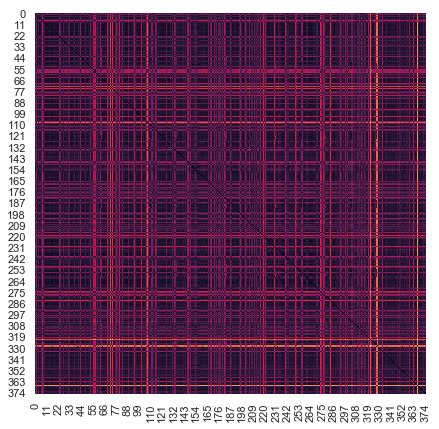

In [182]:
plt.figure(figsize=(7,7))
sns.heatmap(distances_d00,cbar=False)

#### Perform PCA

In [207]:
%%time

log_d00 = np.log2(d00 + 1) # Log-transformation
d00_PCA = PCA(n_components=50).fit_transform(log_d00) # PCA with 50 PCs on log2-transformed data

log_c00 = np.log2(c00 + 1) # Log-transformation
c00_PCA = PCA(n_components=50).fit_transform(log_c00) # PCA with 50 PCs on log2-transformed data

print('Shape of the resulting PC matrices:', d00_PCA.shape, ' ', c00_PCA.shape, '\n')

Shape of the resulting PC matrices: (375, 50)   (375, 50) 

CPU times: user 2.47 s, sys: 531 ms, total: 3 s
Wall time: 1.93 s


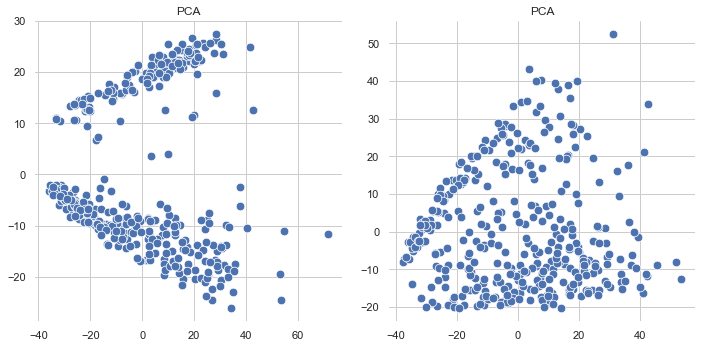

In [209]:
# Plot principal component analysis

plt.figure(figsize=(10,5))

plt.subplot(121)
sns.scatterplot(d00_PCA[:,0], d00_PCA[:,1], s=75)
plt.title('PCA')

plt.subplot(122)
sns.scatterplot(c00_PCA[:,0], c00_PCA[:,1], s=75)
plt.title('PCA')

sns.despine(left=True, bottom=True)
plt.tight_layout()

CPU times: user 6.7 ms, sys: 2.3 ms, total: 9.01 ms
Wall time: 8.27 ms


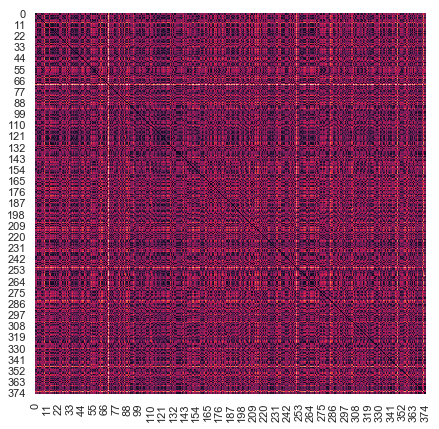

In [184]:
%time distances_d00_PCA = sc.spatial.distance_matrix(x=Y,y=Y)
plt.figure(figsize=(7,7))
sns.heatmap(distances_d00_PCA,cbar=False)

#### Perform tSNE

In [212]:
# This uses perplexity=30 (default) and random initialisation
%time d00_tSNE_p30 = fast_tsne(d00_PCA,seed=18,perplexity=30)
%time c00_tSNE_p30 = fast_tsne(c00_PCA,seed=18,perplexity=30)

CPU times: user 2.61 ms, sys: 8.36 ms, total: 11 ms
Wall time: 9.44 s
CPU times: user 3.17 ms, sys: 6.15 ms, total: 9.32 ms
Wall time: 9.37 s


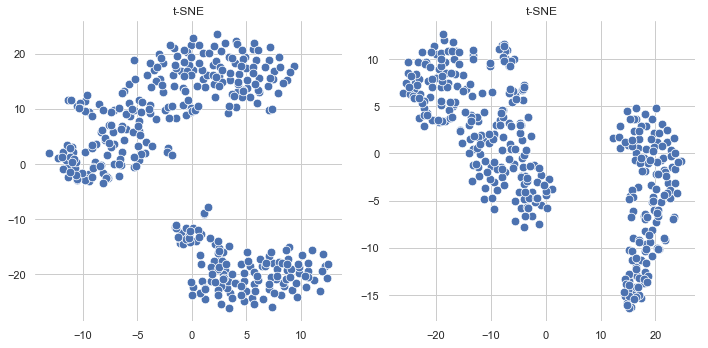

In [214]:
# plot results
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.scatterplot(d00_tSNE_p30[:,0], d00_tSNE_p30[:,1], s=75)
plt.title('t-SNE')

plt.subplot(122)
sns.scatterplot(c00_tSNE_p30[:,0], c00_tSNE_p30[:,1], s=75)
plt.title('t-SNE')

sns.despine(left=True, bottom=True)
plt.tight_layout()

CPU times: user 6.22 ms, sys: 1.34 ms, total: 7.57 ms
Wall time: 8.54 ms


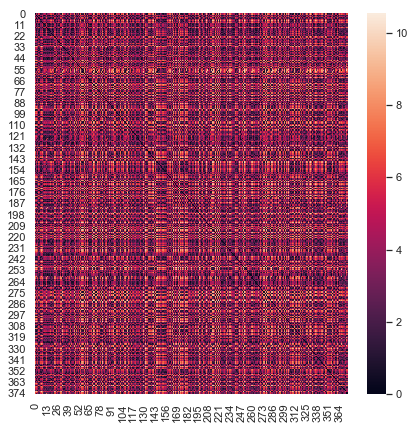

In [206]:
%time distances_d00_tSNE = sc.spatial.distance_matrix(x=tsne30_norm,y=tsne30_norm)
plt.figure(figsize=(7,7))
sns.heatmap(distances_d00_tSNE)